In [2]:
import pandas as pd
from altmo.data.decorators import psycopg_context
from altmo.data import write as w

PG_DSN = 'dbname=schleswig_holstein_osm_2021_06_04 user=thath host=localhost port=5432 password=thath'
STUDY_AREA_ID = 1

In [21]:
with psycopg_context(PG_DSN) as cursor:
    w.add_category_time_zscores(cursor, STUDY_AREA_ID, 'pedestrian')

In [2]:
with psycopg_context(PG_DSN) as cursor:
    w.add_category_time_zscores_all(cursor, STUDY_AREA_ID, 'pedestrian')

In [3]:
df = pd.DataFrame(
    scores, columns=(
        'id', 'administrative_time_zscore', 'community_time_zscore',
        'groceries_time_zscore', 'health_time_zscore', 'nature_time_zscore',
        'outing_destination_zscore', 'school_time_zscore', 'shopping_time_zscore', 'mode'
    )
)

df = df.set_index('id')

<AxesSubplot:>

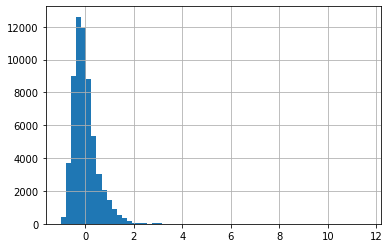

In [12]:
df['administrative_time_zscore'].hist(bins=60)

<AxesSubplot:>

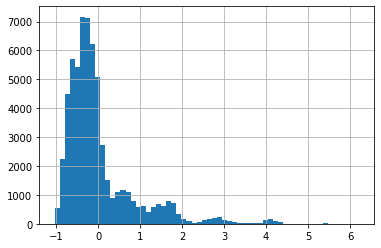

In [13]:
df['community_time_zscore'].hist(bins=60)

In [14]:
df['community_time_zscore'].describe()

count    6.060600e+04
mean     4.299413e-15
std      8.502470e-01
min     -1.041842e+00
25%     -5.108545e-01
50%     -2.396372e-01
75%      1.025349e-01
max      6.211084e+00
Name: community_time_zscore, dtype: float64

In [4]:
df

,administrative_time_zscore,community_time_zscore,groceries_time_zscore,health_time_zscore,nature_time_zscore,outing_destination_zscore,school_time_zscore,shopping_time_zscore,mode
id,,,,,,,,,
1,3.847623,1.436003,3.532389,2.900486,2.486117,2.115480,2.039671,2.065100,walking
2,3.865233,1.442373,3.490426,2.879972,2.422978,2.116728,2.037689,2.072770,walking
3,3.974035,1.734103,3.019363,2.864128,1.580680,2.239547,2.212391,2.359762,walking
4,3.976970,1.735165,3.022114,2.865919,1.584297,2.240875,2.213786,2.361040,walking
5,4.067693,1.708620,3.175784,2.899736,1.803762,2.267303,2.204943,2.329081,walking
...,...,...,...,...,...,...,...,...,...
67961,0.516486,1.882646,1.054436,1.239472,1.033751,0.247688,2.859347,0.846709,walking
67962,0.325165,1.877724,1.087755,1.290776,1.060569,0.169683,2.812659,0.809227,walking
67963,0.208893,1.864140,1.063194,1.291162,0.984379,0.142229,2.791261,0.775163,walking


In [12]:
with psycopg_context(PG_DSN) as cursor:
    cursor.execute('''
        SELECT
            residence_id as id, 
            AVG(average_time) as average_time, AVG(average_distance) as average_distance, 
            AVG(time_zscore) as time_zscore, AVG(distance_zscore)
        FROM
            residence_amenity_distance_standardized
        WHERE
            mode = 'bicycle'
        GROUP BY
            residence_id
        HAVING
            AVG(average_time) < 2500
    ''')
    res = cursor.fetchall()

In [13]:
df1 = pd.DataFrame(
    res, columns=(
        'id', 'average_time', 'average_distance', 'time_zscore', 'distance_zscore'
    )
)

df1 = df1.set_index('id')

In [14]:
df1['average_time'].describe()

count    60437.000000
mean       631.174504
std        262.104274
min         53.833333
25%        437.816993
50%        608.287582
75%        790.702614
max       2133.692810
Name: average_time, dtype: float64

<AxesSubplot:>

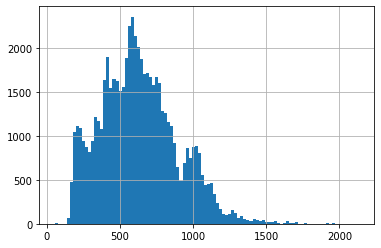

In [16]:
df1['average_time'].hist(bins=100)